In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

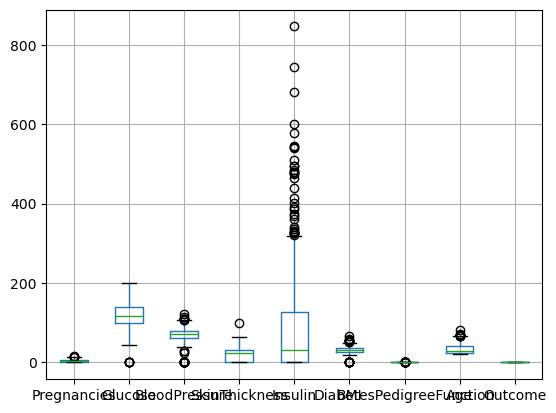

In [6]:
df.boxplot()
plt.show()

In [7]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-(1.5*IQR)
    upper_extreme=Q3+(1.5*IQR)
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x)
for col in df:
    outlier_capping(df,col)

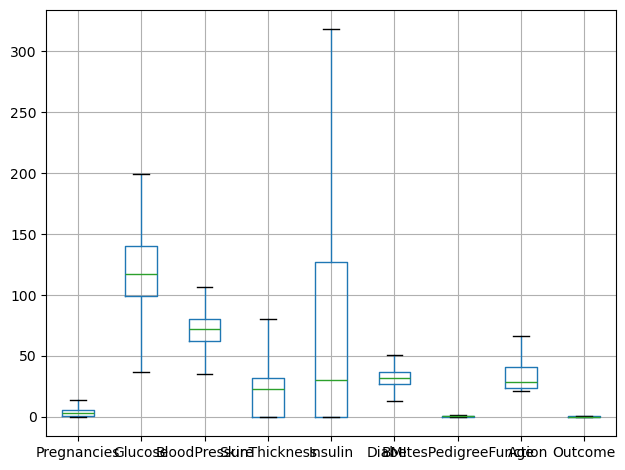

In [8]:
df.boxplot()
plt.tight_layout()
plt.show()


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


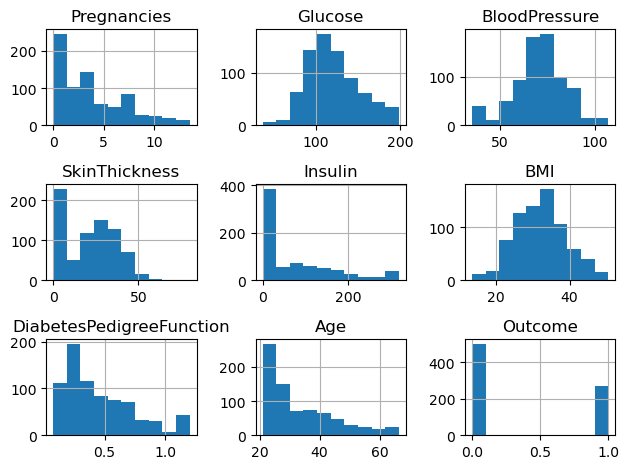

In [11]:
df.hist()
plt.tight_layout()
plt.show()

In [12]:
corr=df.corr()

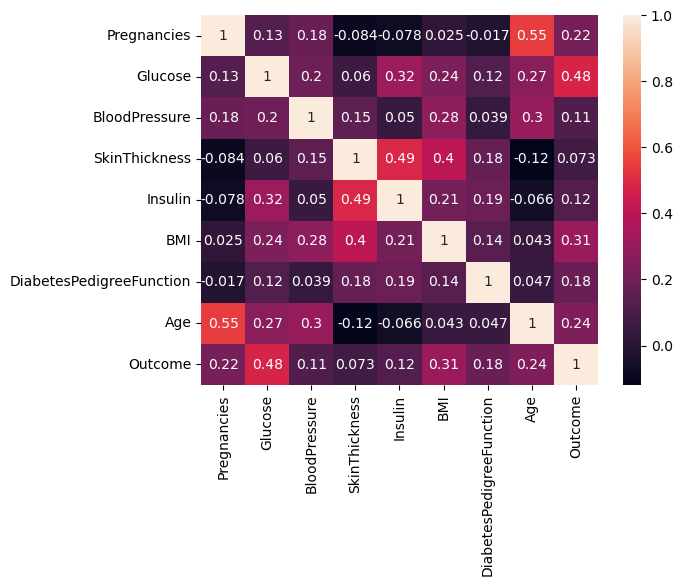

In [13]:
sns.heatmap(data=corr,annot=True)
plt.show()

In [14]:
target=df[['Outcome']]
features=df.drop(columns=['Outcome'])

In [15]:
target.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [16]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [20]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [21]:
log=LogisticRegression()

In [24]:
log.fit(x_train,y_train)

LogisticRegression()

In [27]:
ypred=log.predict(x_train)
accuracy_score(y_train,ypred)

0.7964169381107492

In [34]:
print(classification_report(y_test,ypred1))


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       101
           1       0.64      0.55      0.59        53

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [37]:
sigmoid= log.predict_proba(x_test)[:,1]
sigmoid

array([0.19693174, 0.05543405, 0.69953992, 0.16871381, 0.46382379,
       0.71614584, 0.97376475, 0.1224906 , 0.89613692, 0.22853992,
       0.1133155 , 0.89729653, 0.57857025, 0.4487127 , 0.68958941,
       0.3784824 , 0.11851524, 0.22861171, 0.5043569 , 0.28427317,
       0.30354281, 0.01594043, 0.52042643, 0.97710191, 0.36146464,
       0.92365133, 0.48955752, 0.32044069, 0.34021547, 0.44149302,
       0.06852717, 0.95822124, 0.23403802, 0.49028525, 0.35870991,
       0.37251481, 0.9417126 , 0.02801078, 0.18345202, 0.30205091,
       0.37870395, 0.82323907, 0.51951551, 0.14029585, 0.24533327,
       0.89382047, 0.12272032, 0.27110279, 0.90585953, 0.90891678,
       0.15937862, 0.05823561, 0.37586467, 0.70341622, 0.83504639,
       0.9413604 , 0.15972687, 0.06934388, 0.75912353, 0.13558533,
       0.17955813, 0.14325543, 0.3563867 , 0.30581485, 0.50678901,
       0.3320074 , 0.18502623, 0.03107169, 0.26818743, 0.03765503,
       0.02230354, 0.72471176, 0.10227678, 0.20387126, 0.23708

In [40]:
roc_auc_score(y_test,ypred1)

0.6943769848682981

In [42]:
auc_score=roc_auc_score(y_test,sigmoid)
auc_score

0.777321128339249

In [43]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)

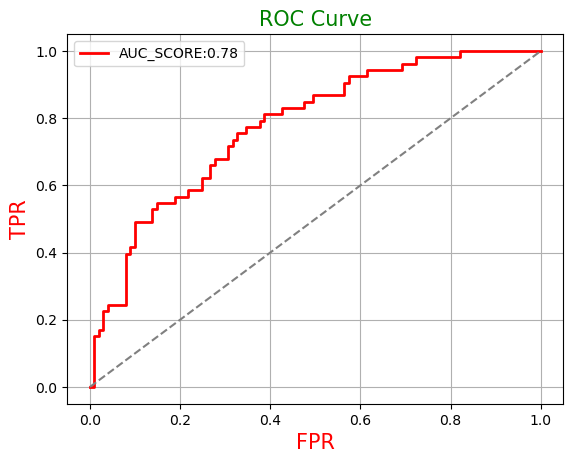

In [45]:
plt.plot(fpr,tpr,color='red',linewidth=2,label=f'AUC_SCORE:{auc_score:.2f}') # to display the auc_score in the graph
plt.plot([0,1],linestyle='--',color='grey')
plt.grid()
plt.xlabel('FPR',size=15,color='red')
plt.ylabel('TPR',size=15,color='red')
plt.title("ROC Curve",color="green",size=15)
plt.legend()
plt.show()

In [47]:
log.coef_

array([[ 1.75306659e-01,  3.30297612e-02, -6.45888545e-03,
        -1.29827200e-02, -2.57693547e-04,  9.19275169e-02,
         1.99239118e+00,  4.05899592e-03]])

In [48]:
log.intercept_

array([-8.68810881])

In [49]:
## from correlation matrix we can see that outcome is depending upon BMI(0.31) and Glucose(0.48) more.
## Age,Pregnancy,Diabetes comes then.
## Insulin, skinthickness,bloodpressure is leastly related to outcome

In [51]:
file='logis.pkl'

In [52]:
pickle.dump(log,open(file,'wb'))

# INTERVIEW QUESTIONS

1. What is the difference between precision and recall?

Precision is to get the actual total positive from positives predicted.Precision=TP/(TP + FP)
Recall is to get from all positives how much was rightly predicted.Recall=TP/(TP + FN)

2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used to check how well a model performs on new, unseen data.
It helps make sure the model isn’t just doing well on the training data but can also handle real-world data effectively.
In binary classification, cross-validation also ensures that metrics like precision, recall, and accuracy remain fair and balanced, without favoring one class over the other.